In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading Dataset
data = pd.read_csv('/Users/adilmohammed/Library/CloudStorage/OneDrive-presidencyuniversity.in/Data Science/Projects/Car Price Prediction/Data.csv')
data.head(6)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

<h1 style='color:green';>Data Cleaning</h1>

In [6]:
#Dropping Id column since it has no correlation with any attribute.
data.drop(['ID'], axis = 1, inplace = True)

In [7]:
data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
data['Levy'].head(10)
#Levy contains different values and '-'

0    1399
1    1018
2       -
3     862
4     446
5     891
6     761
7     751
8     394
9       -
Name: Levy, dtype: object

In [9]:
data['Levy'].value_counts()
#5819 rows has levy value '-' which is 30% of dataset.

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [10]:
#Replacing levy value from '-' to the mean of levy attribute.
#First replacing '-' with NaN
data['Levy'] = data['Levy'].replace('-', np.nan)

In [11]:
#Second chaning data type of levy from object to float.
data['Levy'] = data['Levy'].astype(float)
#Third replacing NaN with mean of levy attribute.
data['Levy'].fillna(data['Levy'].mean(), inplace = True)

In [12]:
data['Levy'].value_counts()

906.838128     5819
765.000000      486
891.000000      461
639.000000      410
640.000000      405
               ... 
3156.000000       1
2908.000000       1
1279.000000       1
1719.000000       1
1901.000000       1
Name: Levy, Length: 559, dtype: int64

In [13]:
#Converting Category, Leather interior, Fuel type, Gear box type, Drive wheels, wheel, color to numeric.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
for col in columns:
    data[col] = encoder.fit_transform(data[col])

In [14]:
#Converting Cylinders data type from float to int.
data['Cylinders'] = data['Cylinders'].astype(int)

In [15]:
#Removing km from Mileage attribute and converting it to int.
data['Mileage'] = data['Mileage'].str.replace('km', '')
data['Mileage'] = data['Mileage'].astype(int)

In [16]:
#Changing Doors attribute values from 04-May to 4-5 and 02-Mar to 2-3.
data['Doors'] = data['Doors'].str.replace('04-May', '4-5')
data['Doors'] = data['Doors'].str.replace('02-Mar', '2-3')

In [17]:
#changing Prod. year attribute to age of car and deleting Prod. year attribute.
data['Prod. year'] = 2020 - data['Prod. year']
data.rename(columns = {'Prod. year':'Age Of Car'}, inplace = True)

In [18]:
#Price attribute values less than 1000 are outliers so removing them.
data = data[data['Price'] > 1000]

In [19]:
data.head(6)

,Price,Levy,Manufacturer,Model,Age Of Car,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.000000,LEXUS,RX 450,10,4,1,2,3.5,186005,6,0,0,4-5,0,12,12
1,16621,1018.000000,CHEVROLET,Equinox,9,4,0,5,3,192000,6,2,0,4-5,0,1,8
2,8467,906.838128,HONDA,FIT,14,3,0,5,1.3,200000,4,3,1,4-5,1,1,2
3,3607,862.000000,FORD,Escape,9,4,1,2,2.5,168966,4,0,0,4-5,0,14,0
4,11726,446.000000,HONDA,FIT,6,3,1,5,1.3,91901,4,0,1,4-5,0,12,4
5,39493,891.000000,HYUNDAI,Santa FE,4,4,1,1,2,160931,4,0,1,4-5,0,14,4


<h1 style='color:tomato';>Exploratory Data Analysis</h1>

<AxesSubplot:>

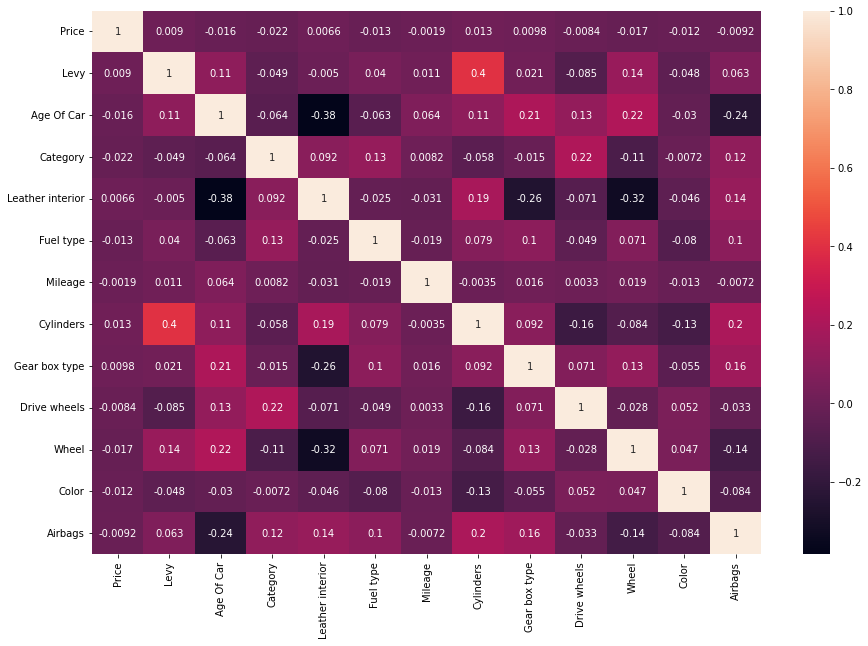

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

Text(0, 0.5, 'Levy Price')

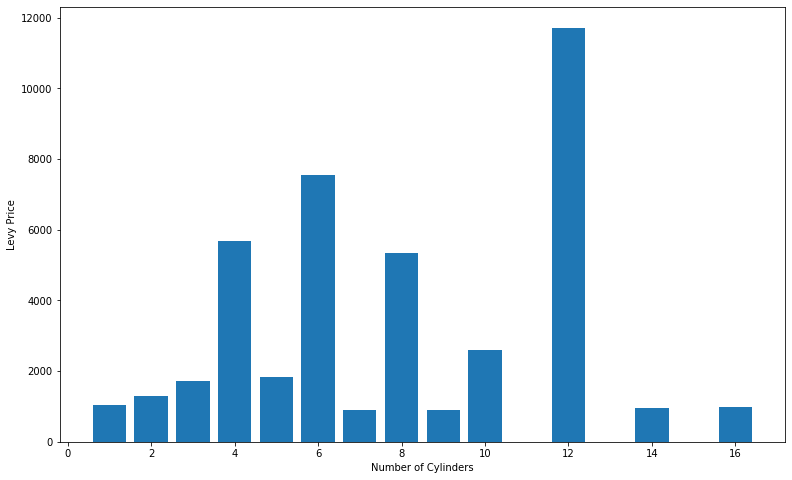

In [21]:
plt.figure(figsize=(13, 8))
plt.bar(data['Cylinders'], data['Levy'])
plt.xlabel('Number of Cylinders')
plt.ylabel('Levy Price')
#12 number of cylinders in car has more levy fee than 14 and 16.

array([<AxesSubplot:ylabel='None'>], dtype=object)

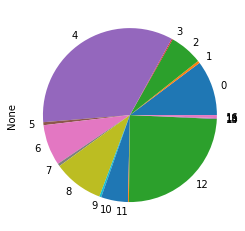

In [22]:
data.groupby('Airbags').size().plot(kind='pie', subplots=True)
#Most of the cars have 4 or 12 airbags.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders', ylabel='count'>

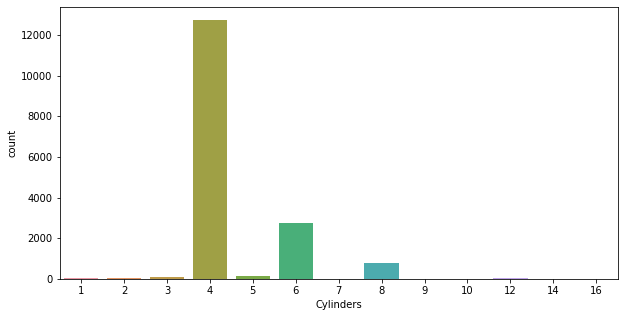

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(data['Cylinders'])
#Most of the cars have 4 or 6 cylinders.

# Model Development

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
X = data[['Levy', 'Leather interior', 'Cylinders', 'Gear box type']]
Y = data['Price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [28]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = reg.predict(x_test)

In [30]:
print('R2 Score: ', np.abs(r2_score(y_test, y_pred)))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.0394319516382563
Root Mean Squared Error:  18089.507197503248


# Residual Analysis

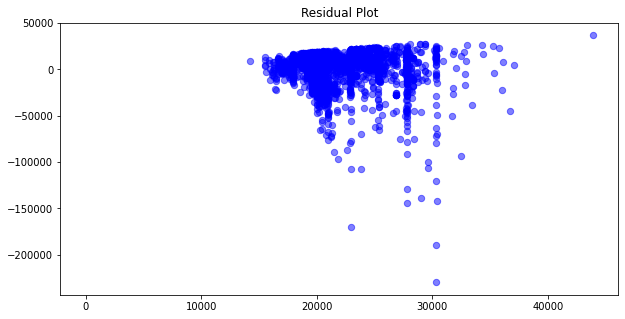

In [36]:
# Residual Plot
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, y_pred - y_test, c = 'b', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot')
#From the residual plot we can see that the model is not a good fit.